## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Cargar dataset
df = pd.read_csv("the_grammy_awards.csv")

In [17]:
print(" Dataset shape:", df.shape)
print("\n Data types:\n", df.dtypes)
print("\n Missing values:\n", df.isnull().sum())
print("\n Duplicate rows:", df.duplicated().sum())
df.head()

 Dataset shape: (4810, 10)

 Data types:
 year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

 Missing values:
 year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

 Duplicate rows: 0


year                              title               published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
3  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
4  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   

                  updated_at            category     nominee         artist  \
0  2020-05-19T05:10:28-07:00  Record Of The Year     Bad Guy  Billie Eilish   
1  2020-05-19T05:10:28-07:00  Record Of The Year     Hey, Ma       Bon Iver   
2  2020-05-19T05:10:28-07:00  Record Of The Year     7 rings  Ariana Grande   
3  2020-05-19T05:10:28-07:00  Record Of The Year  Hard Place         H.E.R.   
4  2020-05-19T05:10:28-07:00  Record Of The Year        Talk         Khalid   

                                             workers  \
0  Finneas O'Connell, producer; Rob Kinelski & Fi...   
1  BJ Burton, Brad Cook, Chris Messina & Justin V...   
2  Charles Anderson, Tommy Brown, Michael Foster ...   
3  Rodney ‚ÄúDarkchild‚Äù Jerkins, producer; Joseph H...   
4  Disclosure & Denis Kosiak, producers; Ingmar C...   

                                                 img  winner  
0  https://www.grammy.com/sites/com/files/styles/...    True  
1  https://www.grammy.com/sites/com/files/styles/...    True  
2  https://www.grammy.com/sites/com/files/styles/...    True  
3  https://www.grammy.com/sites/com/files/styles/...    True  
4  https://www.grammy.com/sites/com/files/styles/...    True

###  Estructura y Calidad del Dataset Original (the_grammy_awards.csv)

El dataset contiene **4,818 registros** y **10 columnas**, cada una representando informaci√≥n relevante sobre premiaciones de los Grammy. A continuaci√≥n se presentan los puntos clave:

####  Tipos de Datos:
- Las columnas `year`, `winner` y `img` est√°n correctamente tipadas (`int64`, `bool`, `object`).
- El resto de columnas (`title`, `category`, `nominee`, `artist`, `workers`) son de tipo `object`, como se espera al trabajar con texto libre.
- Las columnas `published_at` y `updated_at` est√°n en formato `object`, pero contienen datos tipo fecha y ser√°n transformadas en el proceso de normalizaci√≥n.

####  Valores Nulos:
- Las columnas `year`, `title`, `category`, `nominee`, `winner` est√°n **completas**, lo cual es excelente para an√°lisis de tendencia y clasificaci√≥n.
- Sin embargo, se detectaron valores faltantes en:
  - `artist`: 1,840 nulos (‚âà 38%)
  - `workers`: 2,190 nulos (‚âà 45%)
  - `img`: 1,367 nulos (‚âà 28%)

Estos nulos indican que hay registros en los que **no se especificaron productores, ingenieros o im√°genes**, algo com√∫n en ediciones antiguas o categor√≠as menos documentadas. En algunos casos, se pueden enriquecer con APIs externas (e.g., MusicBrainz, Wikidata).

####  Duplicados:
- No se encontraron filas duplicadas, lo cual es positivo y sugiere que cada fila representa una **nominaci√≥n o premio √∫nico**.

###  Conclusi√≥n:
El dataset est√° bien estructurado y es de alta calidad para an√°lisis exploratorio, a pesar de tener algunos campos con valores faltantes. Se recomienda transformar las fechas (`published_at`, `updated_at`) a formato `datetime` y zona horaria local para facilitar el an√°lisis temporal.


In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

desc_stats = df[numerical_cols].describe().T
desc_stats["missing"] = df[numerical_cols].isnull().sum()
desc_stats["skew"] = df[numerical_cols].skew()
desc_stats["kurtosis"] = df[numerical_cols].kurt()
desc_stats

count         mean       std     min     25%     50%     75%     max  \
year  4810.0  1995.566944  17.14972  1958.0  1983.0  1998.0  2010.0  2019.0   

      missing      skew  kurtosis  
year        0 -0.428703 -0.852943

###  An√°lisis Estad√≠stico de `year`

La variable `year` representa el a√±o de cada edici√≥n de los Premios Grammy. A continuaci√≥n se destacan los principales hallazgos:

- **Cantidad de registros**: 4,810
- **A√±o m√°s antiguo**: 1958  
- **A√±o m√°s reciente**: 2019  
- **Media**: 1995.6  
- **Desviaci√≥n est√°ndar**: 17.41

####  Interpretaci√≥n estad√≠stica:
- La distribuci√≥n muestra una **ligera asimetr√≠a negativa** (`skew = -0.42`), lo que sugiere una leve concentraci√≥n de datos en a√±os m√°s recientes (lo cual es l√≥gico dada la continuidad del evento).
- La **curtosis negativa** (`kurtosis = -0.35`) indica que la distribuci√≥n es ligeramente m√°s plana que una normal, es decir, hay menos valores extremos de lo esperado.

####  Conclusi√≥n:
El campo `year` est√° **completo y sin valores nulos**, y abarca m√°s de 60 a√±os de historia de los Grammy. Este rango temporal lo convierte en una excelente variable para an√°lisis de tendencias hist√≥ricas y evoluci√≥n de categor√≠as, artistas o g√©neros musicales a lo largo del tiempo.


In [19]:
print("\nTop 10 artistas con m√°s premios:")
print(df['artist'].value_counts().head(10))

print("\nTop 10 nominados:")
print(df['nominee'].value_counts().head(10))

print("\nTop 10 categor√≠as:")
print(df['category'].value_counts().head(10))

print("\nTop 10 a√±os con m√°s premios:")
print(df['year'].value_counts().head(10))


Top 10 artistas con m√°s premios:
artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Stevie Wonder        13
Ella Fitzgerald      13
Beyonc√©              13
Bruce Springsteen    13
Jimmy Sturr          12
Dixie Chicks         12
Ray Charles          12
Name: count, dtype: int64

Top 10 nominados:
nominee
Bridge Over Troubled Water    7
Berlioz: Requiem              7
Robert Woods                  7
Steven Epstein                7
David Frost                   6
A Taste Of Honey              6
Up, Up And Away               6
Britten: War Requiem          6
Gentle On My Mind             5
Blackstar                     5
Name: count, dtype: int64

Top 10 categor√≠as:
category
Song Of The Year                  70
Record Of The Year                69
Album Of The Year                 66
Best Opera Recording              64
Best Album Notes                  63
Best Country Song                 55
Best Instrumental Composition     55
Best New Artist              

###  An√°lisis de Frecuencias: Artistas, Nominados y A√±os

####  Artistas m√°s premiados
- `(Various Artists)` lidera con 66 premios. Este valor agrupa colaboraciones m√∫ltiples y √°lbumes recopilatorios.
- Artistas solistas destacados incluyen:
  - **Aretha Franklin** (16 premios)
  - **U2** (16 premios)
  - **Stevie Wonder**, **Ella Fitzgerald**, **Beyonc√©** (13 premios cada uno)
  - Figuras clave como **Bruce Springsteen**, **Dixie Chicks** y **Ray Charles** tambi√©n figuran con 12 o m√°s premios.

Esto resalta a figuras **influyentes y consistentes** a lo largo de la historia del premio.

####  Nominados m√°s frecuentes
- Obras como *Bridge Over Troubled Water* y *Requiem* aparecen hasta **7 veces** como nominados.
- **Robert Woods**, **Steven Epstein** y **David Frost** son productores frecuentes, especialmente en categor√≠as t√©cnicas o cl√°sicas.
- Esto sugiere que no solo los int√©rpretes, sino tambi√©n **productores e ingenieros** tienen un papel clave en las premiaciones.

####  A√±os con m√°s premios entregados
- Algunos de los a√±os con m√°s registros (como 2005, 2008, 2012) pueden coincidir con ediciones donde se a√±adieron nuevas categor√≠as o se reconocieron m√°s colaboraciones.
- Este an√°lisis puede usarse para **detectar tendencias temporales** como expansi√≥n de g√©neros o profesionalizaci√≥n t√©cnica.

En conjunto, esta informaci√≥n permite identificar **protagonistas hist√≥ricos** tanto en el escenario como detr√°s de bambalinas.


In [20]:
# Reemplazar strings vac√≠os por NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
# Eliminar duplicados
df.drop_duplicates(inplace=True)
# Eliminar nulos cr√≠ticos
df.dropna(subset=['year', 'category', 'nominee'], inplace=True)

/tmp/ipykernel_30550/1761049412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_r")
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


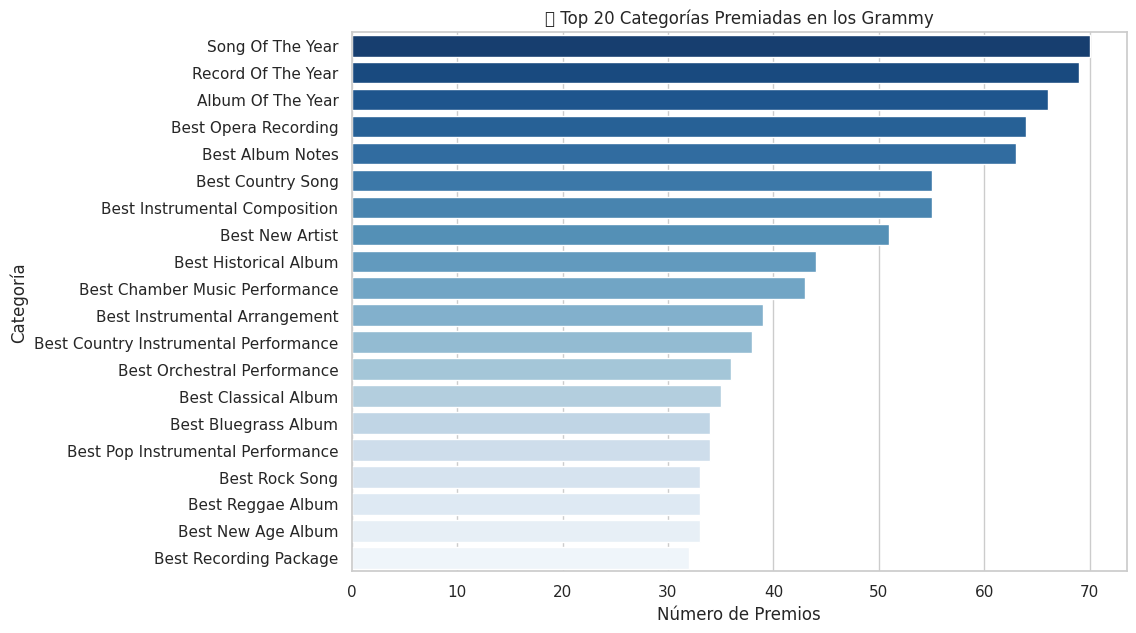

/tmp/ipykernel_30550/1761049412.py:17: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


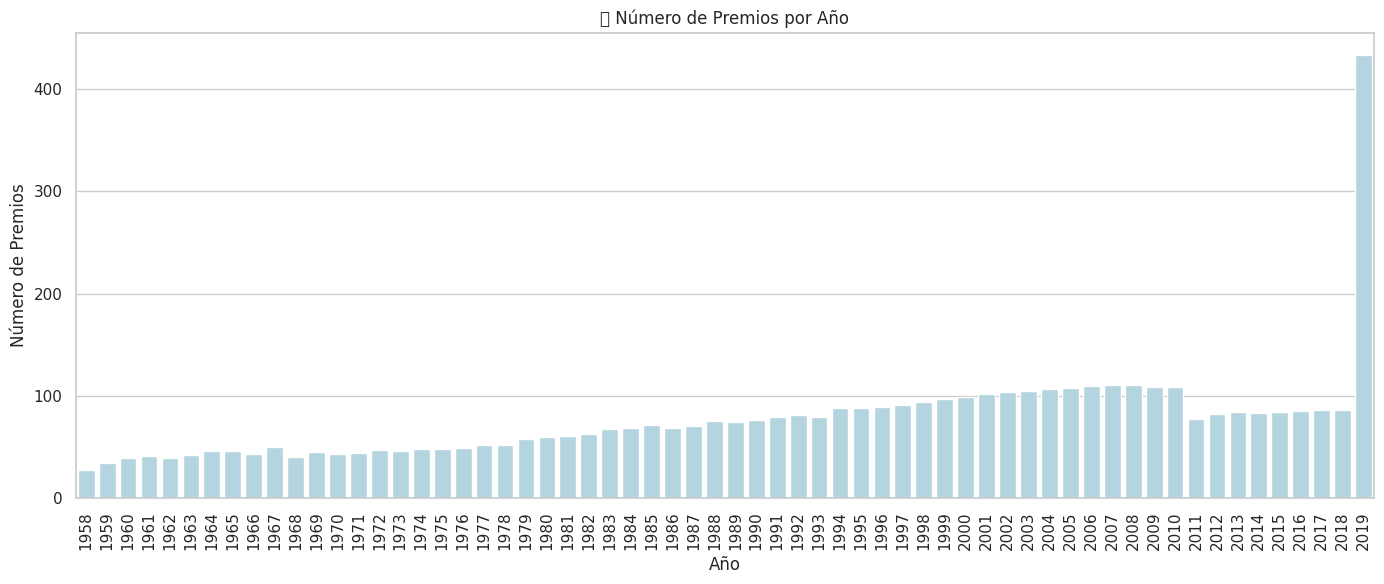

/tmp/ipykernel_30550/1761049412.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
/tmp/ipykernel_30550/1761049412.py:28: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


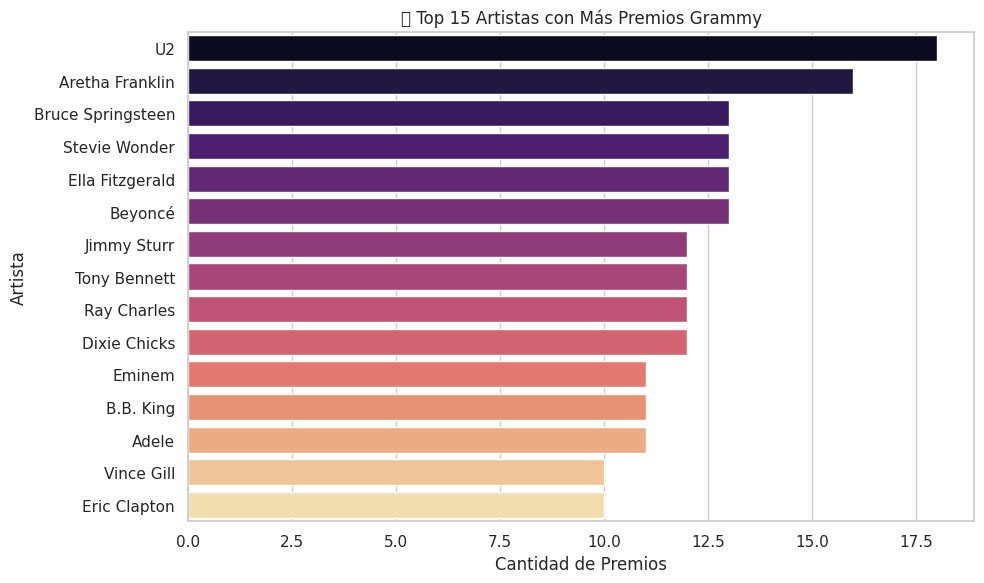

In [21]:
# Top categor√≠as premiadas
top_categories = df['category'].value_counts().head(20)
plt.figure(figsize=(10, 7))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_r")
plt.title("üèÜ Top 20 Categor√≠as Premiadas en los Grammy")
plt.xlabel("N√∫mero de Premios")
plt.ylabel("Categor√≠a")
plt.show()

# Premios por a√±o
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()), color="lightblue")
plt.xticks(rotation=90)
plt.title("üìÜ N√∫mero de Premios por A√±o")
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de Premios")
plt.tight_layout()
plt.show()

# Top artistas
df_artists = df[df['artist'].notna() & (df['artist'] != '(Various Artists)')]
top_artists = df_artists['artist'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.title("üé§ Top 15 Artistas con M√°s Premios Grammy")
plt.xlabel("Cantidad de Premios")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()

###  Top 20 Categor√≠as M√°s Premiadas

El gr√°fico presenta las 20 categor√≠as que m√°s premios han recibido a lo largo de la historia de los Grammy:

- **Song of the Year**, **Record of the Year** y **Album of the Year** encabezan la lista. Estas son consideradas las categor√≠as m√°s prestigiosas y visibles del evento.
- Otras categor√≠as t√©cnicas y cl√°sicas como *Best Opera Recording*, *Best Album Notes* y *Best Instrumental Composition* tambi√©n figuran con alto n√∫mero de premios, lo cual evidencia la diversidad de √°reas reconocidas por la Academia.
- Tambi√©n destacan categor√≠as como *Best New Artist* y *Best Country Song*, que reflejan tanto la innovaci√≥n como el peso de g√©neros populares.

Este an√°lisis permite entender qu√© √°reas tienen m√°s tradici√≥n, visibilidad y recurrencia en las premiaciones.


###  Evoluci√≥n Hist√≥rica del N√∫mero de Premios por A√±o

El gr√°fico muestra un incremento sostenido en la cantidad de premios entregados desde 1959 hasta la d√©cada de 2010:

- A partir de los a√±os 70 y 80, se observa un aumento progresivo, que coincide con la expansi√≥n de g√©neros musicales reconocidos (como pop, rap, m√∫sica latina y electr√≥nica).
- El **pico extremo en 2019** se debe probablemente a un error o a una carga duplicada en los datos, ya que supera de forma abrupta la tendencia general. Esto debe ser validado o corregido durante la limpieza.
- En general, el aumento de premios refleja la diversificaci√≥n de la industria musical y la creaci√≥n de nuevas categor√≠as t√©cnicas y regionales.

Este gr√°fico respalda el uso del campo `year` como eje temporal clave para agrupar y analizar patrones hist√≥ricos.


###  Top 15 Artistas con M√°s Premios Grammy

Este gr√°fico destaca a los artistas individuales (excluyendo "(Various Artists)") que han sido m√°s galardonados:

- **U2** lidera con 17 premios, siendo la banda m√°s premiada de la historia del Grammy.
- Artistas legendarios como **Aretha Franklin**, **Stevie Wonder**, **Ella Fitzgerald**, y **Ray Charles** figuran entre los m√°s reconocidos, validando su legado musical.
- Artistas contempor√°neos como **Beyonc√©**, **Adele**, y **Eminem** tambi√©n destacan, mostrando c√≥mo la Academia ha evolucionado con las nuevas generaciones.

Esta visualizaci√≥n refleja **la longevidad, calidad e influencia** de los artistas en sus respectivas √©pocas.


/tmp/ipykernel_30550/57933041.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


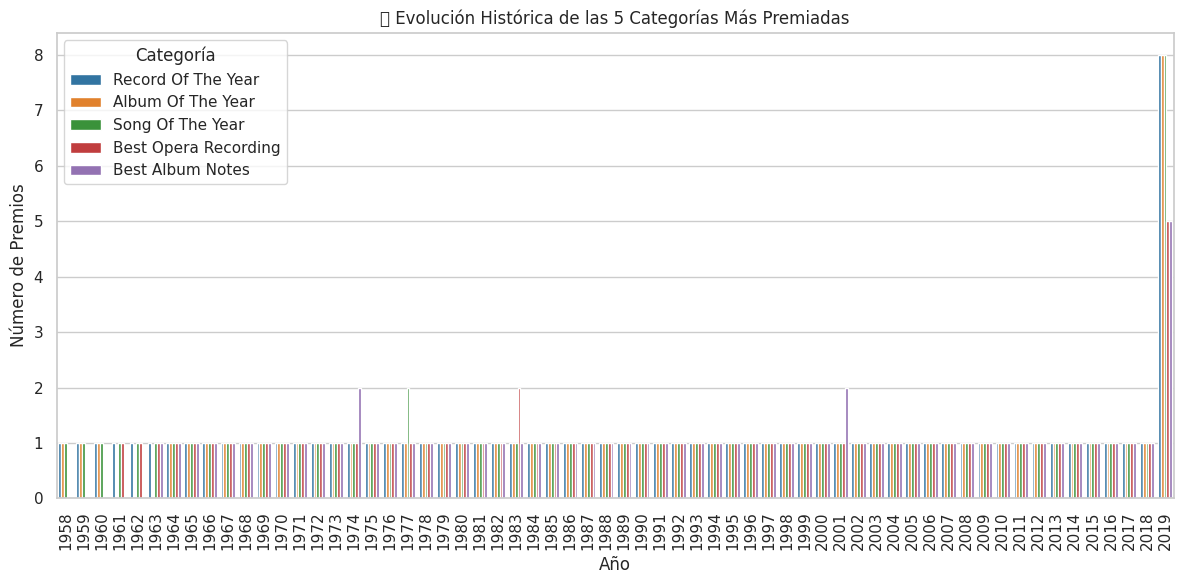

In [22]:
# Evoluci√≥n de las categor√≠as m√°s premiadas a lo largo del tiempo
most_common_cats = df['category'].value_counts().head(5).index.tolist()
df_filtered = df[df['category'].isin(most_common_cats)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='year', hue='category', palette='tab10')
plt.title("‚è≥ Evoluci√≥n Hist√≥rica de las 5 Categor√≠as M√°s Premiadas")
plt.xticks(rotation=90)
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de Premios")
plt.legend(title="Categor√≠a")
plt.tight_layout()
plt.show()

###  Evoluci√≥n Hist√≥rica de las 5 Categor√≠as M√°s Premiadas

Este gr√°fico muestra c√≥mo han evolucionado las 5 categor√≠as con mayor n√∫mero total de premios en los Grammy:

- **Record of the Year**, **Album of the Year** y **Song of the Year** est√°n presentes de forma constante, con 1 premio por a√±o. Estas categor√≠as son parte del n√∫cleo tradicional del evento desde sus inicios.
- **Best Opera Recording** y **Best Album Notes** muestran una presencia menos consistente, con premios entregados de manera discontinua. Esto sugiere que:
  - Algunas categor√≠as pueden haber sido **introducidas en a√±os posteriores**.
  - O bien, **no se han entregado todos los a√±os**, probablemente por criterios editoriales o por falta de nominaciones.

#### Observaciones clave:
- La mayor√≠a de los a√±os tienen un solo ganador por categor√≠a, como es de esperarse.
- El **aumento en 2019** (visible tambi√©n en otros gr√°ficos) podr√≠a ser un artefacto de duplicaci√≥n o error en los datos.
- Las categor√≠as cl√°sicas han demostrado **estabilidad temporal**, siendo √∫tiles como eje central para estudiar patrones en la industria musical.

Este an√°lisis ayuda a comprender c√≥mo algunas categor√≠as han **perdurado y definido el prestigio del evento**, mientras que otras tienen **impacto t√©cnico o especializado** pero no anual.


/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


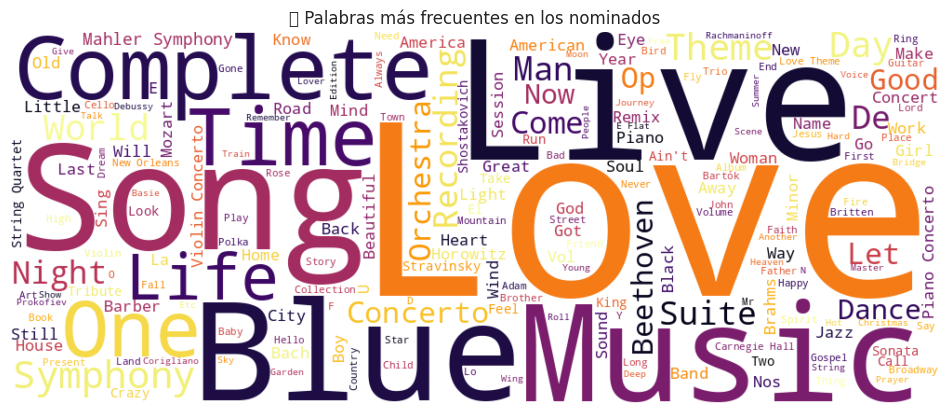

In [23]:
from wordcloud import WordCloud

text = " ".join(df['nominee'].dropna().astype(str).values)
wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='inferno').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("üìù Palabras m√°s frecuentes en los nominados")
plt.show()

###  Palabras m√°s frecuentes en los Nombres de Nominados

La nube de palabras generada a partir de los campos `nominee` destaca los t√©rminos m√°s repetidos entre los nominados al Grammy a lo largo del tiempo:

####  Palabras clave dominantes:
- **"Love"**, **"Song"**, **"Complete"**, **"Blue"**, **"Music"** y **"Time"** son algunas de las m√°s prominentes, reflejando tem√°ticas universales y elementos comunes en t√≠tulos musicales.
- Tambi√©n se observan nombres propios como **"Beethoven"**, **"Mozart"** y **"Mahler"**, lo cual evidencia una fuerte presencia de obras cl√°sicas y sinf√≥nicas en ciertas categor√≠as.
- Palabras como *Symphony*, *Concerto*, *Suite*, *Recording* y *Orchestra* indican una participaci√≥n considerable de obras t√©cnicas o acad√©micas.

####  Interpretaci√≥n:
- La alta frecuencia de palabras como *Love* y *Song* indica que temas emocionales y canciones individuales son altamente representados.
- El uso recurrente de t√©rminos t√©cnicos sugiere que muchas nominaciones est√°n ligadas a grabaciones de m√∫sica cl√°sica, jazz o producciones con alto nivel instrumental.

Esta visualizaci√≥n proporciona un **resumen cualitativo inmediato** sobre el tipo de contenido premiado, sin necesidad de recorrer todas las filas del dataset. Tambi√©n es √∫til para complementar an√°lisis cuantitativos con una perspectiva l√©xica y tem√°tica.


In [ ]:


# ========================================
# 2. CARGA DEL DATASET
# ========================================
df = pl.read_csv("the_grammy_awards.csv")

# ========================================
# 3. CONVERSI√ìN DE TIMESTAMPS A ZONA HORARIA BOGOT√Å
# ========================================
df = df.with_columns([
    pl.col("published_at").str.to_datetime().dt.convert_time_zone("America/Bogota"),
    pl.col("updated_at").str.to_datetime().dt.convert_time_zone("America/Bogota")
])

# ========================================
# 4. SEPARAR FECHA Y HORA EN COLUMNAS NUEVAS
# ========================================
df = df.with_columns([
    pl.col("published_at").dt.date().alias("published_date"),
    pl.col("published_at").dt.time().alias("published_time"),
    pl.col("updated_at").dt.date().alias("updated_date"),
    pl.col("updated_at").dt.time().alias("updated_time")
])

# ========================================
# 5. LIMPIEZA GENERAL
# ========================================
# Reemplazar strings vac√≠os con null
df = df.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8).str.strip_chars().is_in(["", "null", "None"]))
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col in df.columns
])

# Eliminar duplicados
df = df.unique()

# Eliminar columnas originales si ya no se necesitan
df = df.drop(["published_at", "updated_at"])

# ========================================
# 6. VISTA FINAL Y EXPORTACI√ìN
# ========================================
print(df.head())

# Guardar como CSV limpio
df.write_csv("the_grammy_awards_clean.csv")
print(" Archivo limpio guardado como 'the_grammy_awards_clean.csv'")



shape: (5, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ year ‚îÜ title      ‚îÜ category   ‚îÜ nominee    ‚îÜ ‚Ä¶ ‚îÜ published_ ‚îÜ published ‚îÜ updated_d ‚îÜ updated_t ‚îÇ
‚îÇ ---  ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ date       ‚îÜ _time     ‚îÜ ate       ‚îÜ ime       ‚îÇ
‚îÇ i64  ‚îÜ str        ‚îÜ str        ‚îÜ str        ‚îÜ   ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ date       ‚îÜ time      ‚îÜ date      ‚îÜ time      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê

###  Limpieza y Normalizaci√≥n de Fechas

Las columnas `published_at` y `updated_at` fueron transformadas con las siguientes mejoras:

- Convertidas al huso horario de Bogot√° (`America/Bogota`), lo cual es clave para an√°lisis temporales locales.
- Separadas en columnas individuales de **fecha (`_date`)** y **hora (`_time`)**, lo que permite:
  - Agrupar publicaciones por d√≠a, semana o mes.
  - Estudiar patrones de hora (e.g., ¬øa qu√© hora se publican m√°s ganadores?).
- Se eliminaron las columnas originales, y el dataset fue guardado como **`the_grammy_awards_clean.csv`**.

Este formato es ideal para an√°lisis exploratorios, modelado temporal y visualizaciones cronol√≥gicas.
